In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from timeit import default_timer as timer
from tensorflow.keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

#path_train = "/content/gdrive/My Drive/Data Science/Dataset/train_imperson_without4n7_balanced_data.csv"
#path_test = "/content/gdrive/My Drive/Data Science/Dataset/test_imperson_without4n7_balanced_data.csv"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
path_train = './Dataset/train_imperson_without4n7_balanced_data.csv'
path_test = './Dataset/test_imperson_without4n7_balanced_data.csv'

In [4]:
# Read training dataset
df_train = pd.read_csv(path_train)
print(df_train.head())

   1  2  3         5         6         8         9  10  11  12  ...  146  147  \
0  0  0  0  0.000066  0.000066  0.009150  0.009150   0   0   0  ...  0.0    0   
1  0  0  0  0.000014  0.000014  0.000000  0.000000   0   0   0  ...  0.0    0   
2  0  0  0  0.035528  0.035528  0.070588  0.070588   0   0   0  ...  0.0    0   
3  0  0  0  0.005128  0.005128  0.094771  0.094771   0   0   0  ...  0.0    0   
4  0  0  0  0.035116  0.035116  0.070588  0.070588   0   0   0  ...  0.0    0   

   148  149  150  151  152  153  154  155  
0    0    0    0    0    0    0  0.0    0  
1    0    0    0    0    0    0  0.0    0  
2    0    0    0    0    0    0  0.0    0  
3    0    0    0    0    0    0  0.0    0  
4    0    0    0    0    0    0  0.0    0  

[5 rows x 153 columns]


In [6]:
# Read test dataset
df_test = pd.read_csv(path_test)
print(df_test.head())

   1  2  3         5         6        8        9  10  11  12  ...      146  \
0  0  0  0  0.002547  0.002547  0.98824  0.98824   0   0   0  ...  0.16667   
1  0  0  0  0.003296  0.003296  0.98824  0.98824   0   0   0  ...  0.16667   
2  0  0  0  0.003285  0.003285  0.98824  0.98824   0   0   0  ...  0.16667   
3  0  0  0  0.005942  0.005942  0.00000  0.00000   0   0   0  ...  0.00000   
4  0  0  0  0.001519  0.001519  0.98824  0.98824   0   0   0  ...  0.16667   

   147  148  149  150  151  152  153      154  155  
0    0    0    0    0    0    0    0  0.98674    0  
1    0    0    0    0    0    0    0  0.98674    0  
2    0    0    0    0    0    0    0  0.98674    0  
3    0    0    0    0    0    0    0  0.00000    0  
4    0    0    0    0    0    0    0  0.98674    0  

[5 rows x 153 columns]


In [8]:
# statistics - training dataset
print("Number of rows : {} .".format(len(df_train)))
print('='*40)
print('Number of data points:', df_train.shape[0])
print('='*40)
print('Number of features:', df_train.shape[1])
print('='*40)
output = df_train['155'].values
labels = set(output)
print('List of labels :', labels)
print('='*125)
print('Number of labels: :', len(labels))

Number of rows : 97044 .
Number of data points: 97044
Number of features: 153
List of labels : {0, 1}
Number of labels: : 2


In [10]:
# statistics - test dataset

print("Number of rows : {} .".format(len(df_test)))
print('='*40)
print('Number of data points:', df_test.shape[0])
print('='*40)
print('Number of features:', df_test.shape[1])
print('='*40)
output = df_test['155'].values
labels = set(output)
print('List of labels :', labels)
print('='*125)
print('Number of labels: :', len(labels))

Number of rows : 40158 .
Number of data points: 40158
Number of features: 153
List of labels : {0, 1}
Number of labels: : 2


In [11]:
# check NULL values - training dataset

print('Number of columns with NULL values: ',len(df_train[df_train.isnull().any(1)]))
print('='*40)
df_train.isnull().sum()

Number of columns with NULL values:  0


1      0
2      0
3      0
5      0
6      0
      ..
151    0
152    0
153    0
154    0
155    0
Length: 153, dtype: int64

In [12]:
# check NULL values - test dataset
print('Number of columns with NULL values: ',len(df_test[df_test.isnull().any(1)]))
print('='*40)
df_test.isnull().sum()

Number of columns with NULL values:  0


1      0
2      0
3      0
5      0
6      0
      ..
151    0
152    0
153    0
154    0
155    0
Length: 153, dtype: int64

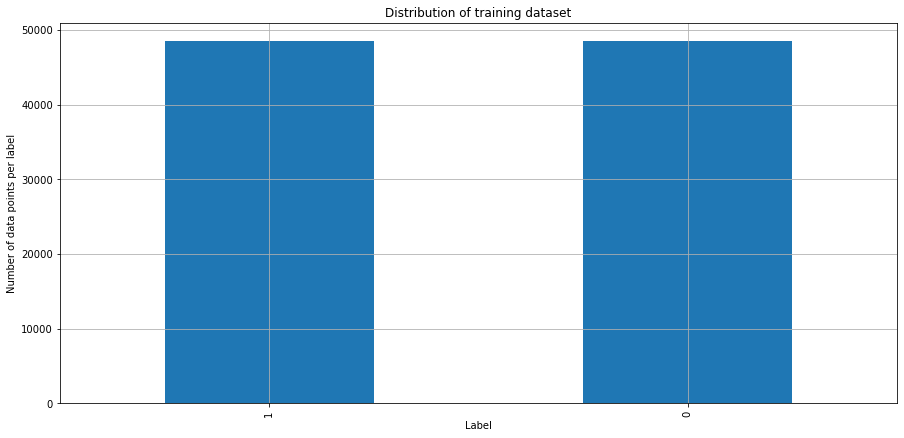

In [17]:
# Dataset analysis

import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df_train['155'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Number of data points per label')
plt.title('Data distribution of training dataset')
plt.grid()
plt.show()

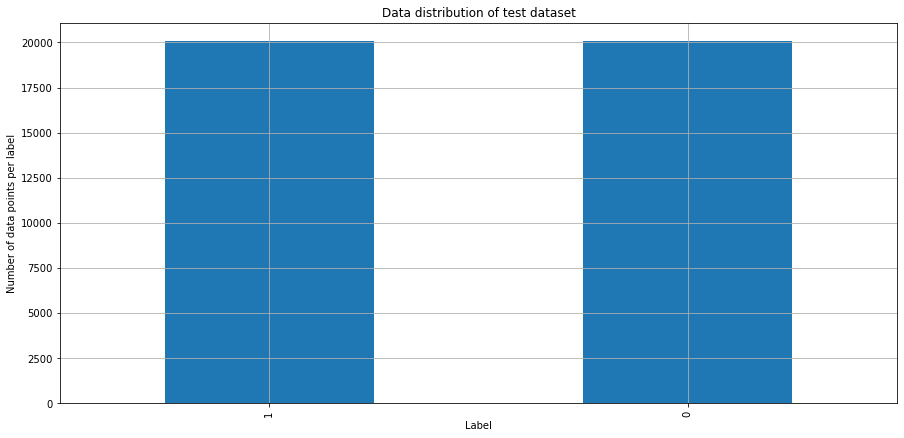

In [18]:
plt.figure(figsize=(15,7))
class_distribution = df_test['155'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Number of data points per label')
plt.title('Data distribution of test dataset')
plt.grid()
plt.show()

Experiment 1 : 
Using 154 original features,  preprocessing technique StandardScaler, apply SVM to classify predict label.
Using values of columns 0 đến 154 as features, column 155 is label

In [19]:

# Target variable and train set
Y_train = df_train[['155']]
X_train = df_train.drop(['155',], axis=1)

# StandardScaler preprocessing
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [20]:
print(len(X_train), len(Y_train))

97044 97044


In [21]:
# StandardScaler on test dataset
Y_test = df_test[['155']]
X_test = df_test.drop(['155',], axis=1)
X_test = sc.fit_transform(X_test)

In [22]:
print(len(X_test), len(Y_test))

40158 40158


In [24]:
# testing LinearSVC on original dataset
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# define model
model = LinearSVC(C=1.0,random_state=42)
# fit model on training set
start = timer()
model.fit(X_train, np.array(Y_train).ravel())
end = timer()
print("Training time: ", end - start)

# make prediction on test set
start = timer()
Y_pred = model.predict(X_test)
end = timer()
print("Prediction time: ", end - start)

# calculate accuracy
accuracy = float(accuracy_score(Y_test, Y_pred))

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
FPR = fp / (fp + tn)
FNR = fn / (fn + tp)
FAR = (FPR + FNR) / 2

print("Result of model LinearSVC")
print("Accuracy: ",accuracy)
print("FPR score: ", FPR)
print("FNR score: ", FNR)
print("FAR score: ", FAR)

Training time:  11.801758728000095
Prediction time:  0.007431713999949352
Result of model LinearSVC
Accuracy:  0.8394093331341203
FPR score:  0.08406793166990388
FNR score:  0.23711340206185566
FAR score:  0.16059066686587978


In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [26]:
# Configure AutoDecoder.
n_inputs = 152
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer

# using one of activation functions: ["linear","sigmoid","softmax","tanh", "ReLu"]
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

# using on of the loss functions = ["mse", "binary_crossentropy"]
# using one of the optimiser = ["sgd", "adamax", "adagrad", "RMSprop","adam"]
model.compile(optimizer="adam", loss='binary_crossentropy',metrics=["accuracy"])

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 152)]             0         
                                                                 
 dense (Dense)               (None, 304)               46512     
                                                                 
 batch_normalization (BatchN  (None, 304)              1216      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 304)               0         
                                                                 
 dense_1 (Dense)             (None, 152)               46360     
                                                                 
 batch_normalization_1 (Batc  (None, 152)              608       
 hNormalization)                                             

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/10
6066/6066 [==============================] - 19s 3ms/step - loss: 0.1092 - accuracy: 0.0129 - val_loss: 0.6404 - val_accuracy: 0.0000e+00
Epoch 2/10
6066/6066 [==============================] - 17s 3ms/step - loss: 0.0485 - accuracy: 2.9883e-04 - val_loss: 6.3276 - val_accuracy: 0.0000e+00
Epoch 3/10
6066/6066 [==============================] - 22s 4ms/step - loss: 0.0240 - accuracy: 0.0000e+00 - val_loss: 0.3745 - val_accuracy: 0.0000e+00
Epoch 4/10
6066/6066 [==============================] - 21s 3ms/step - loss: 0.0210 - accuracy: 0.0000e+00 - val_loss: 6.8663 - val_accuracy: 0.0000e+00
Epoch 5/10
6066/6066 [==============================] - 20s 3ms/step - loss: 0.0237 - accuracy: 9.2741e-05 - val_loss: 3.6043 - val_accuracy: 4.9803e-05
Epoch 6/10
6066/6066 [==============================] - 23s 4ms/step - loss: 

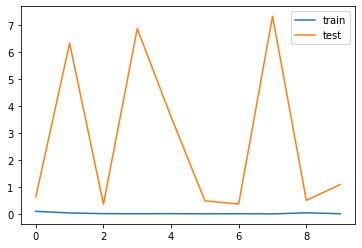

In [27]:
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

# batch size: 16, epochs: 10
history = model.fit(X_train, Y_train, epochs=10, batch_size=16, verbose=1, validation_data=(X_test,Y_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [31]:
pip install pydot

You should consider upgrading via the '/Users/michellehoang/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [32]:
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [33]:
# load the model from file
encoder = load_model('encoder.h5')

In [34]:
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

EXPERIMENT 2: Using feature extraction Autodecoder, then apply Linear SVM model


In [35]:
 # define the model
model = LinearSVC(C=1.0,random_state=42)

# fit model on training set
start = timer()
model.fit(X_train_encode, np.array(Y_train).ravel())
end = timer()
print("Training time: ", end - start)

# make prediction on test set
start = timer()
Y_pred = model.predict(X_test_encode)
end = timer()
print("Prediction time: ", end - start)


# calculate accuracy
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
accuracy = float(accuracy_score(Y_test, Y_pred))

FPR = fp / (fp + tn)
FNR = fn / (fn + tp)
FAR = (FPR + FNR) / 2

print("Result of Linear SVM model after using AutoEncoder")
print("Accuracy: ",accuracy)
print("FPR score: ", FPR)
print("FNR score: ", FNR)
print("FAR score: ", FAR)

Training time:  29.312668477999978
Prediction time:  0.015914403999886417
Result of Linear SVM model after using AutoEncoder
Accuracy:  0.593754669057224
FPR score:  0.041286916679117484
FNR score:  0.7712037452064345
FAR score:  0.406245330942776


EXPERIMENT 3: Concatinate additional feature from AutoEncoder with original dataset

In [36]:

# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

# Concate two feature
X_train_concat = np.concatenate((X_train, X_train_encode), axis=1)
X_test_concat = np.concatenate((X_test, X_test_encode), axis=1)
print(X_train_concat)

[[  0.           0.           0.         ...   9.74053669 -11.92098618
   -2.76527119]
 [  0.           0.           0.         ...  11.87184525 -14.32646275
   -3.51068997]
 [  0.           0.           0.         ...  13.57366085 -20.19068909
  -10.38341713]
 ...
 [  0.           0.           0.         ...  -6.96696329   4.46377134
   -2.11791658]
 [  0.           0.           0.         ...  -6.08670139   3.97511697
   -1.78805709]
 [  0.           0.           0.         ...  -6.05116892   3.95318675
   -1.77595067]]


In [38]:
print(X_train_concat.shape)

(97044, 304)


In [39]:
# Applying SVM model on this dataset
# define the model
model = LinearSVC(C=1.0,random_state=42)
# fit model on training set
start = timer()
model.fit(X_train_concat, np.array(Y_train).ravel())
end = timer()
print("Training time: ", end - start)

# make prediction on test set
start = timer()
Y_pred = model.predict(X_test_concat)
end = timer()
print("Prediction time: ", end - start)

# calculate accuracy
accuracy = float(accuracy_score(Y_test, Y_pred))

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
FPR = fp / (fp + tn)
FNR = fn / (fn + tp)
FAR = (FPR + FNR) / 2

print("Result of SVM model using AutoEncoder")
print("Accuracy: ",accuracy)
print("FPR score: ", FPR)
print("FNR score: ", FNR)
print("FAR score: ", FAR)

Training time:  14.098168184000087
Prediction time:  0.012838560000091093
Result of SVM model using AutoEncoder
Accuracy:  0.7473977787738433
FPR score:  0.03331839235021664
FNR score:  0.4718860501020967
FAR score:  0.25260222122615666


In [ ]:
# Using feature selection to decrease data dimentions created by Autoencoder
# Apply feature selection techniques (e.g. filter, wrapper and embedded) and see if any of the additional features are selected.
# Recursive Feature Elimination which is a type of wrapper feature selection method.

from sklearn.feature_selection import RFE

selector = RFE(model, n_features_to_select=5, step=1)

start = timer()
selector = selector.fit(X_train_encode, np.array(Y_train).ravel())
end = timer()
print("Training time: ", end - start)

start = timer()
Y_pred = selector.predict(X_test_encode)
end = timer()
print("Prediction time: ", end - start)

# calculate accuracy
accuracy = float(accuracy_score(Y_test, Y_pred))

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
FPR = fp / (fp + tn)
FNR = fn / (fn + tp)
FAR = (FPR + FNR) / 2

print("Result of SVM model using Recursive Feature Elimination as feature selection")
print("Accuracy: ",accuracy)
print("FPR score: ", FPR)
print("FNR score: ", FNR)
print("FAR score: ", FAR)

In [ ]:
# Using GridsearchCV technique on concatinated features from AutoEncoder and original dataset to chose suitable parameter for model
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000]} 
grid = GridSearchCV(LinearSVC(random_state=42), param_grid, refit = True, verbose = 3)
grid.fit(X_train_concat, np.array(Y_train).ravel()) 


In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(X_test_concat)

# calculate accuracy
accuracy = float(accuracy_score(Y_test, Y_pred))

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
FPR = fp / (fp + tn)
FNR = fn / (fn + tp)
FAR = (FPR + FNR) / 2

print("Result of SVM model after using GridsearchCV")
print("Accuracy: ",accuracy)
print("FPR score: ", FPR)
print("FNR score: ", FNR)
print("FAR score: ", FAR)